In [241]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [256]:
#call year month (1) and day (1)
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2020, 12, 1)

In [294]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)


In [295]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [296]:
BAC.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-24,28.990000,27.920000,27.930000,28.980000,80387800.0,28.800495
2020-11-25,29.040001,28.480000,28.709999,29.030001,57249900.0,28.850187
2020-11-27,29.100000,28.809999,28.969999,28.990000,25971600.0,28.810434
2020-11-30,28.860001,28.100000,28.719999,28.160000,63567900.0,27.985575
2020-12-01,29.040001,28.670000,28.740000,28.690001,50307300.0,28.512293


In [297]:
#let's concatenate the bank dataframes together to a single data frame called bank_stocks.
bank_stocks=pd.concat([BAC, C,GS,JPM,MS,WFC], axis=1, keys=tickers)

In [298]:
#Set the column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# Let's go for EDA


In [299]:
#max Close price for banks
bank_stocks.xs(key='Close', axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

In [300]:
returns=pd.DataFrame()

In [301]:
for tick in tickers:
    returns[tick+'_Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC_Return,C_Return,GS_Return,JPM_Return,MS_Return,WFC_Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [302]:
#results for first row is null as there is no data for day before day one for this analysis to compare (and do the pct_change)

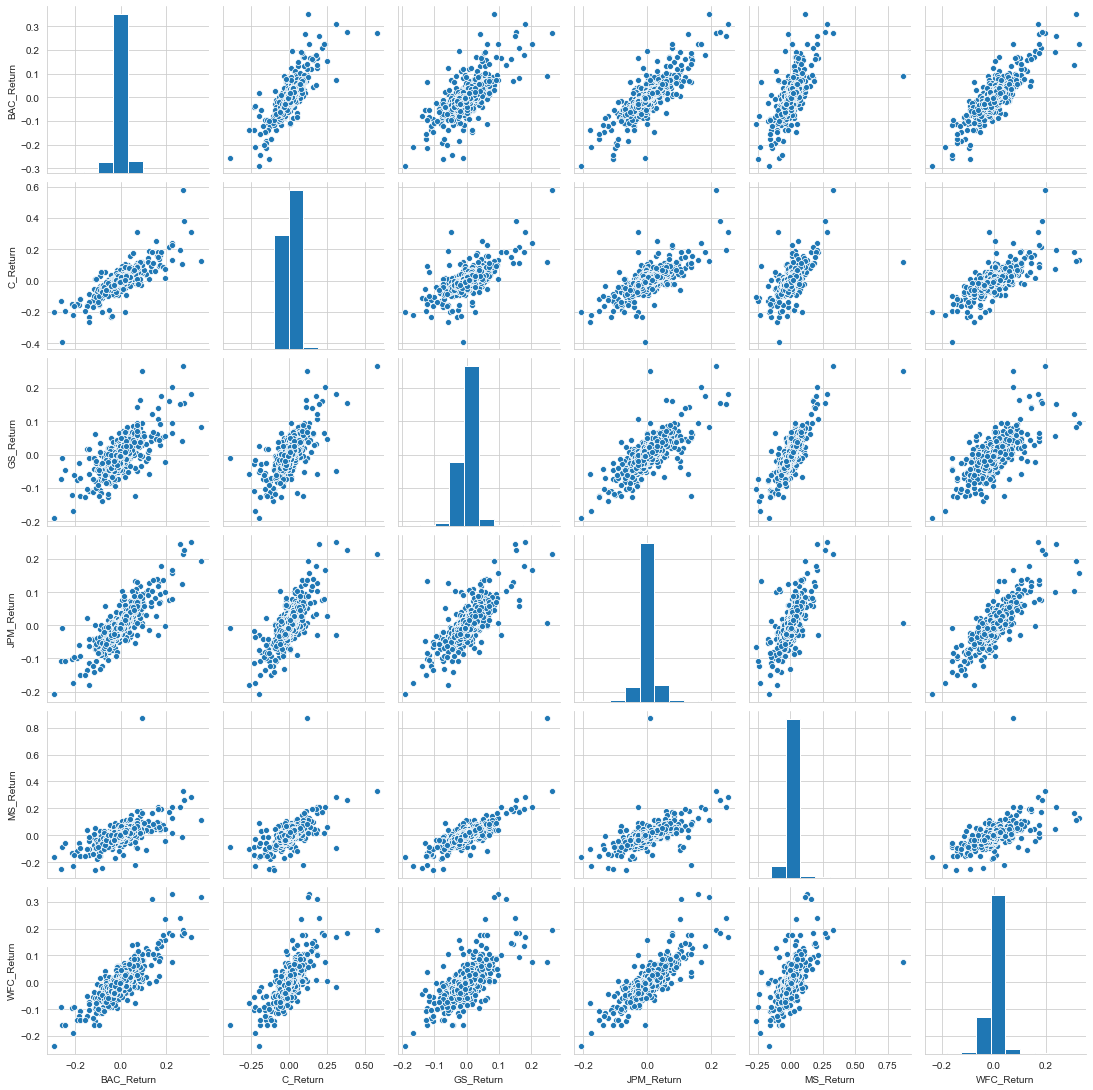

In [274]:
#pairplot :: what is in our stock data 
sns.pairplot(returns[1:])

In [127]:
#best stock day per bank
returns.idxmax()

BAC_Return   2009-04-09
C_Return     2008-11-24
GS_Return    2008-11-24
JPM_Return   2009-01-21
MS_Return    2008-10-13
WFC_Return   2008-07-16
dtype: datetime64[ns]

In [128]:
#worst stock day per bank
returns.idxmin()

BAC_Return   2009-01-20
C_Return     2009-02-27
GS_Return    2009-01-20
JPM_Return   2009-01-20
MS_Return    2008-10-09
WFC_Return   2009-01-20
dtype: datetime64[ns]

Note: JPM and MS have big gain and loss dates are close.

In [335]:
# Which bank stock is the riskiest? 
returns.loc['2008-01-01':'2008-12-31'].std()

BAC_Return    0.062934
C_Return      0.073523
GS_Return     0.050015
JPM_Return    0.053134
MS_Return     0.087604
WFC_Return    0.052439
dtype: float64

In [305]:
# currently all banks have similar low risk potential
returns.loc['2020-01-01':'2020-11-30'].std()

BAC_Return    0.038409
C_Return      0.044097
GS_Return     0.033979
JPM_Return    0.035626
MS_Return     0.037444
WFC_Return    0.039918
dtype: float64

Text(0.5, 1.0, 'JPM Return in 2019')

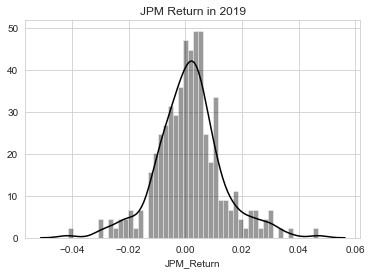

In [309]:
# the stock risk in a regular year 
sns.distplot(returns.loc['2019-01-01':'2019-12-31']['JPM_Return'], color='black', bins=50)
plt.title("JPM Return in 2019")

Text(0.5, 1.0, 'JPM Return in 2009')

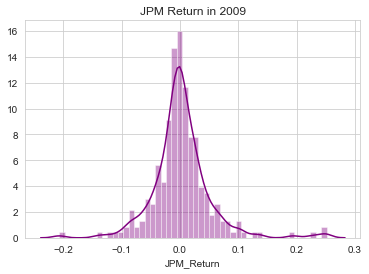

In [310]:
# the stock risk in a rsky year 
sns.distplot(returns.loc['2009-01-01':'2009-12-31']['JPM_Return'], color='purple', bins=50)
plt.title("JPM Return in 2009")

Text(0.5, 1.0, 'MS in 2008')

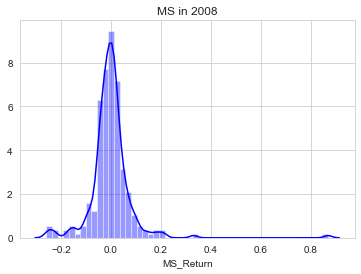

In [311]:
# the MS stock risk in a year with high risk
sns.distplot(returns.loc['2008-01-01':'2008-12-31']['MS_Return'], color='blue', bins=50)
plt.title("MS in 2008")

Text(0.5, 1.0, 'Citi Return in 2008')

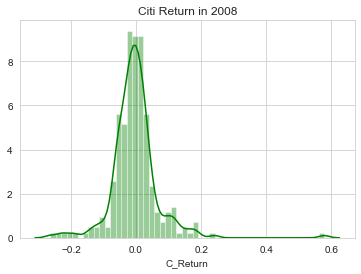

In [312]:
#citi crashded in 2008
sns.distplot(returns['2008-01-01':'2008-12-31']['C_Return'], color='green', bins=50)
plt.title("Citi Return in 2008")

____
# iplot and more data visualization

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()

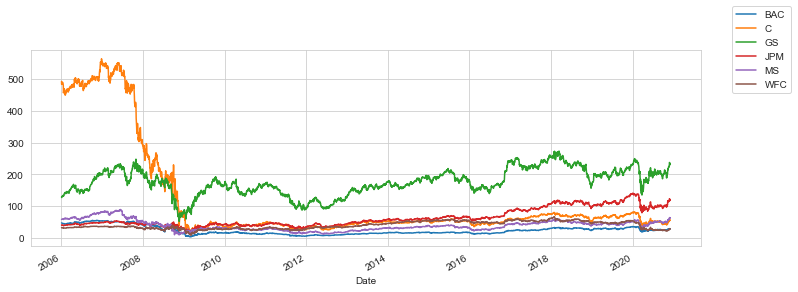

In [319]:
#plots showing Close price for each bank for the time of 2006-2020.
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(figsize=(12,4))
plt.legend(bbox_to_anchor=(1.04,1), loc='center left')

All bank stocks crashed in 2008, GS shows faster recovery.

In [354]:
#let's make an interactive plot for the closing stock prices of each bank.
bank_iplot= bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

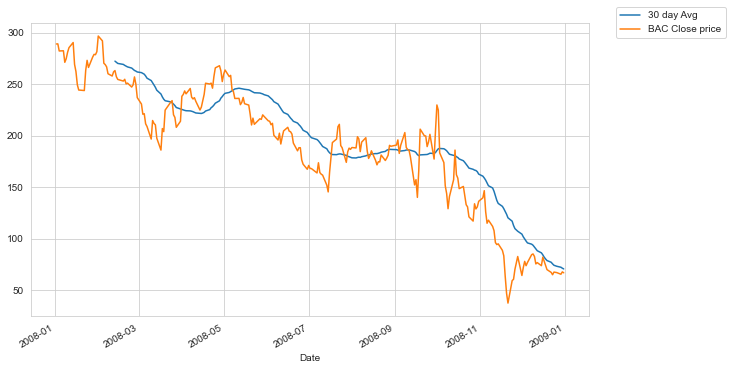

In [321]:
#Moving averages for the stocks in 2008.
plt.figure(figsize=(10,6))
bank_stocks.xs(key='Close', axis=1, level='Stock Info').loc['2008-01-01':'2008-12-31']['C'].rolling(window=30).mean().plot(label='30 day Avg')
bank_stocks.xs(key='Close', axis=1, level='Stock Info').loc['2008-01-01':'2008-12-31']['C'].plot(label='BAC Close price')
plt.legend(bbox_to_anchor=(1.04,1), loc='center left')
#BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC')

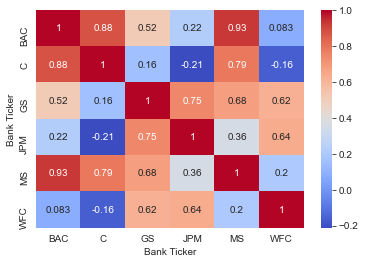

In [324]:
#correlation analysis for bank stocks
close_corr=bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
sns.heatmap(close_corr, annot=True, cmap='coolwarm')

In [330]:
#iplot
#close_corr.iplot(kind='heatmap', colorscale='rdylbu')
close_corr.iplot(kind='heatmap', colorscale='ylorbr')

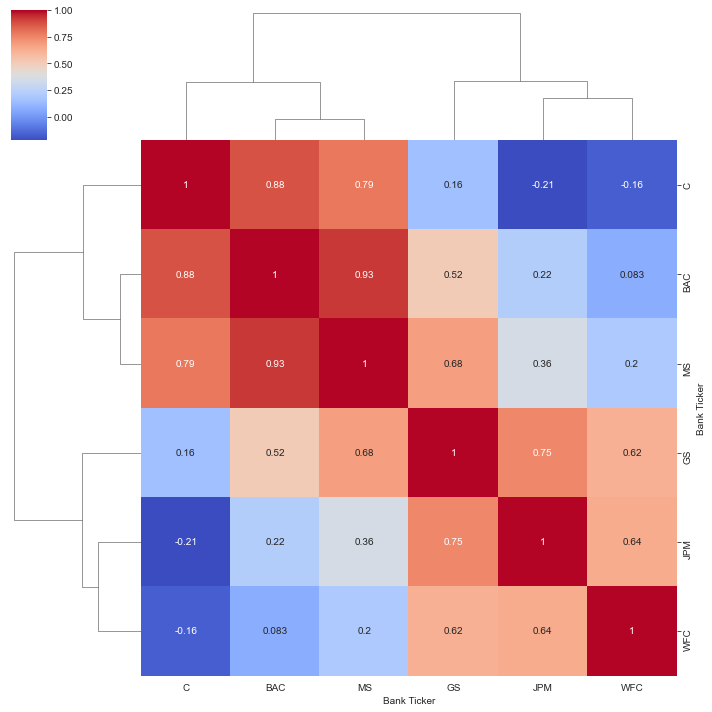

In [331]:
# which bankstocks are closely related?
sns.clustermap(close_corr, annot=True, cmap='coolwarm')

**Let's make a candle plot for Bank of America's stock (from Dec 1st 2019 to Dec 1st 2020.**

In [332]:
import chart_studio.plotly as py
BAC[['Open', 'High', 'Low', 'Close']].loc['2019-12-01':'2020-12-01'].iplot(kind='candle')


In [333]:
#let's look into ta_plot
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Creating a Bollinger Band Plot for Bank of America for the year 2020.**

In [334]:
BAC['Close'].loc['2020-01-01':'2020-12-01'].ta_plot(study='boll')